## Building the Model

In this notebook, I will develop an NLP model that will perform sentiment analysis on the preprocessed data. The dataset (raw & processed) and the code that performs data processing is provided in this repository.

In this notebook, I will build a model, comparing the difference between stemming and lemmatization for model accuracy, and the performance of different ML models on this task.

In [1]:
# Import processed data
import joblib

path = "processed_data/"
# Stemming data
X_train_stem = joblib.load(f'{path}X_train_stem.pkl')
X_test_stem = joblib.load(f'{path}X_test_stem.pkl')
y_train_stem = joblib.load(f'{path}y_train_stem.pkl')
y_test_stem = joblib.load(f'{path}y_test_stem.pkl')

# Lemmatization data
X_train_lem = joblib.load(f'{path}X_train_lem.pkl')
X_test_lem = joblib.load(f'{path}X_test_lem.pkl')
y_train_lem = joblib.load(f'{path}y_train_lem.pkl')
y_test_lem = joblib.load(f'{path}y_test_lem.pkl')

### Here, I will use a logistic regression model for sentiment analysis

In [ ]:
# First, I will define a confusion matrix plotting function
# This will help with interpretable visualizations to evalute the model
import matplotlib.pyplot as plt
import seaborn as sns

# Input arg: sklearn confusion matrix
def visualize_cm(cm):
    fig = plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative", "Positive"],
                yticklabels=["Negative", "Positive"])
    plt.title("Confusion Matrix for Movie Review Sentiment")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    return fig

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       800
           1       0.86      0.89      0.87       800

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



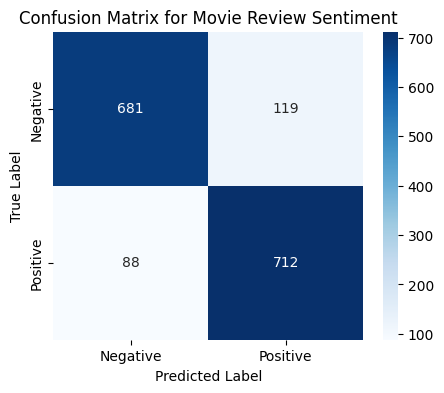

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Stemming Data
logreg_stem = LogisticRegression(random_state=42)
logreg_stem.fit(X_train_stem, y_train_stem)
logreg_stem_preds = logreg_stem.predict(X_test_stem)
print(classification_report(y_test_stem, logreg_stem_preds))
logreg_stem_cm = visualize_cm(confusion_matrix(y_test_stem, logreg_stem_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       800
           1       0.86      0.89      0.88       800

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.87      1600
weighted avg       0.88      0.88      0.87      1600



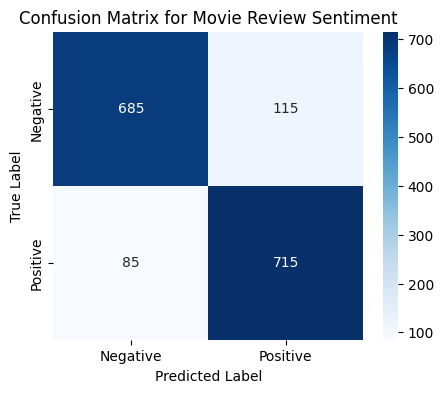

In [21]:
# Lemmatization Data
logreg_lem = LogisticRegression(random_state=42)
logreg_lem.fit(X_train_lem, y_train_lem)
logreg_lem_preds = logreg_lem.predict(X_test_lem)
print(classification_report(y_test_lem, logreg_lem_preds))
logreg_lem_cm = visualize_cm(confusion_matrix(y_test_lem, logreg_lem_preds))

### Using an SVM

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       800
           1       0.86      0.89      0.88       800

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



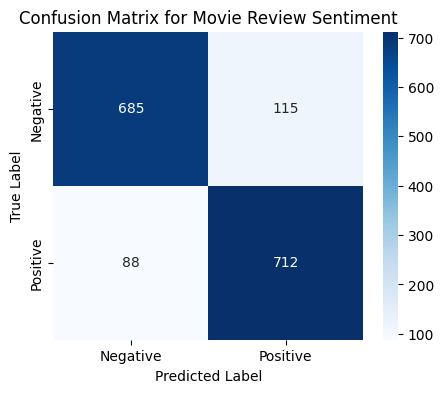

In [22]:
from sklearn.svm import LinearSVC

# Stemming Data
svm_stem = LinearSVC(random_state=42)
svm_stem.fit(X_train_stem, y_train_stem)
svm_stem_preds = svm_stem.predict(X_test_stem)
print(classification_report(y_test_stem, svm_stem_preds))
svm_stem_cm = visualize_cm(confusion_matrix(y_test_stem, svm_stem_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       800
           1       0.86      0.89      0.88       800

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



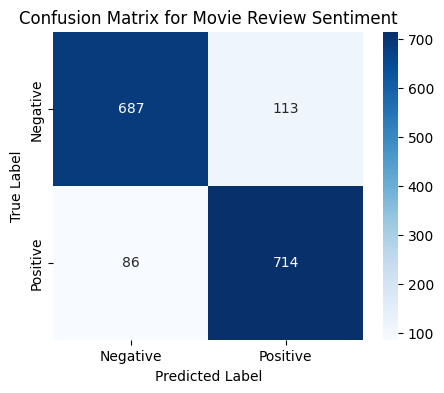

In [23]:
# Lemmatization Data
svm_lem = LinearSVC(random_state=42)
svm_lem.fit(X_train_lem, y_train_lem)
svm_lem_preds = svm_lem.predict(X_test_lem)
print(classification_report(y_test_lem, svm_lem_preds))
svm_lem_cm = visualize_cm(confusion_matrix(y_test_lem, svm_lem_preds))

### Using Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       800
           1       0.87      0.88      0.88       800

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



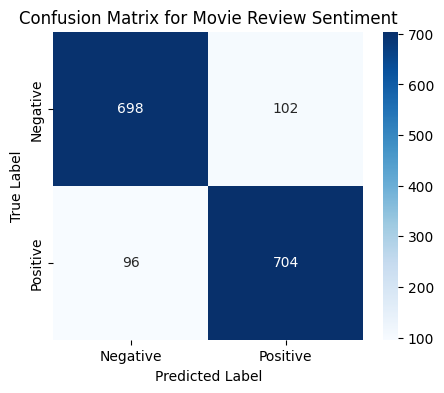

In [25]:
from sklearn.naive_bayes import MultinomialNB

# Stemming Data
nb_stem = MultinomialNB()
nb_stem.fit(X_train_stem, y_train_stem)
nb_stem_preds = nb_stem.predict(X_test_stem)
print(classification_report(y_test_stem, nb_stem_preds))
nb_stem_cm = visualize_cm(confusion_matrix(y_test_stem, nb_stem_preds))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       800
           1       0.87      0.88      0.88       800

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



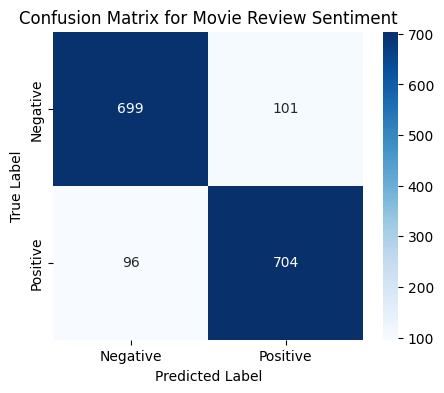

In [11]:
# Lemmatization Data
nb_lem = MultinomialNB()
nb_lem.fit(X_train_lem, y_train_lem)
nb_lem_preds = nb_lem.predict(X_test_lem)
print(classification_report(y_test_lem, nb_lem_preds))
nb_lem_cm = visualize_cm(confusion_matrix(y_test_lem, nb_lem_preds))

### Observations

On average, although the accuracies are mostly uniform between all models, lemmatized data performed just slightly better (by a couple samples) than stemming. 

Accuracy was about 88% across all models; however, MultinomialNB was better at classifying negative reviews compared to Logistic Regression and a LinearSVC. I think using MultinomialNB may be more optimal in the context of this task because classifying negative reviews may be more beneficial in the long-term, as consumer dissatisfaction may be properly classified and addressed in future films.

For further hyperparemeter tuning, I will be using a MultinomialNB model and lemmatized data.

Chosen Parameters:  {'alpha': np.float64(1.452824663751602), 'fit_prior': False}
Highest CV Score:  0.8615625
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       800
           1       0.88      0.88      0.88       800

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



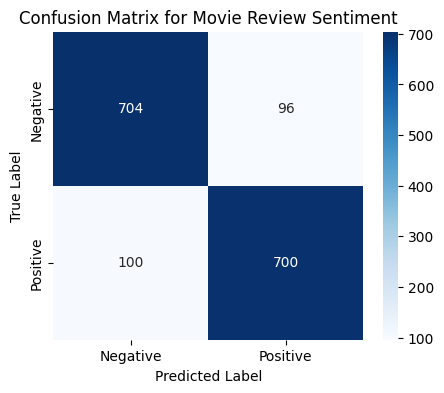

In [26]:
# Import random search for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform # Create a log-uniform distribution for a hyperparameter

param_dist = {"alpha": loguniform(1e-4, 10),
              "fit_prior":[True, False]}
# alpha: controls smoothing
# fit_prior: learns class prior from data

# Re-initialize model
model = MultinomialNB()

# Initialize random search specifications
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=30, scoring="accuracy", cv=10, n_jobs=-1, 
                                   refit=True, random_state=42)

# Find the best model
random_search.fit(X_train_lem, y_train_lem)
best_model = random_search.best_estimator_
print("Chosen Parameters: ", random_search.best_params_)
print("Highest CV Score: ", random_search.best_score_)

# Evaluate the best model
preds = best_model.predict(X_test_lem)
print(classification_report(y_test_lem, preds))
cm = visualize_cm(confusion_matrix(y_test_lem, preds))

In [16]:
nb_lem

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [27]:
best_model

,alpha,np.float64(1.452824663751602)
,force_alpha,True
,fit_prior,False
,class_prior,None
